<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/statistics/sampling_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [18]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'drive/MyDrive/Colab Notebooks/Pratical Statistics Data Scientist/data'

In [19]:
LOANS_INCOME_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Random Sampling and Sample Bias**

https://www.youtube.com/watch?v=Rf-fIpB4D50&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=11

## **Sampling Distribution of a Statistic**

In [21]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
38305  130000.0  Data
25141   80000.0  Data
18846   18720.0  Data
10958   65004.0  Data
30003  170000.0  Data


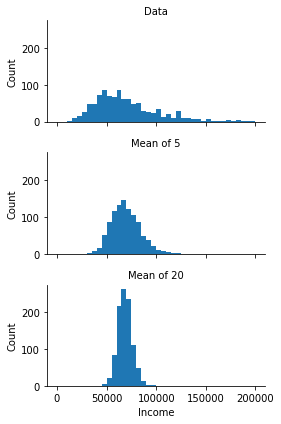

In [22]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

The histogram of the individual data values is broadly spread out and skewed toward higher values, as is to be expected with income data. The histograms of the means of 5 and 20 are increasingly compact and more bell-shaped.

**The more data you have, the less variable a sample estimate will be.**

## **Central Limit Theorem**

It says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed

Source: https://www.youtube.com/watch?v=YAlJCEDH2uY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=20

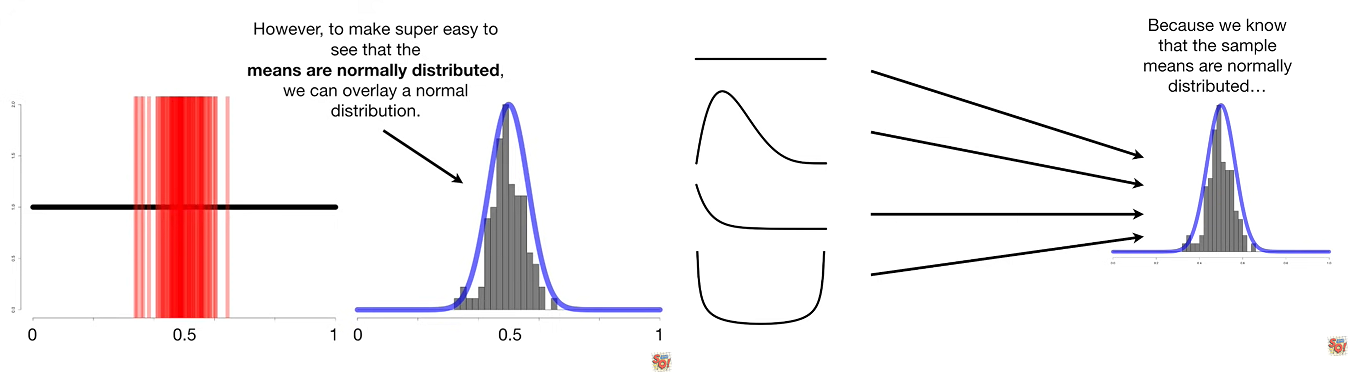

## **Standard Error**

Is a single metric that sums up the variability in the sampling distribution for a statistic.

Do not confuse standard deviation (which measures the variability
of individual data points) with standard error (which measures the
variability of a sample metric).

Source: https://www.youtube.com/watch?v=A82brFpdr9g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=22

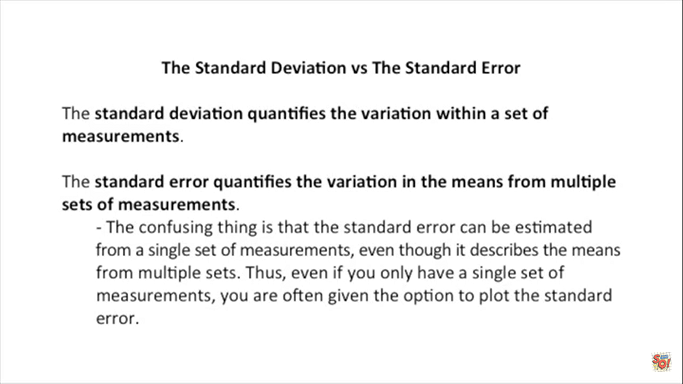

Source: https://www.youtube.com/watch?v=XNgt7F6FqDU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=22

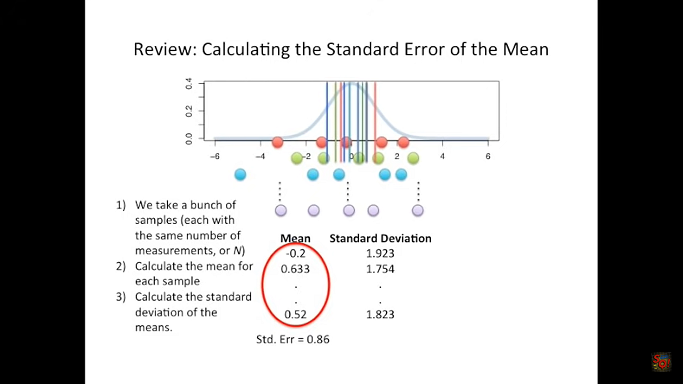

## **The Bootstrap**

* Sampling with replacement from a data set
* When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.
* The bootstrap does not compensate for a small sample size; it does
not create new data

Source: https://www.youtube.com/watch?v=Xz0x-8-cgaQ&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=24

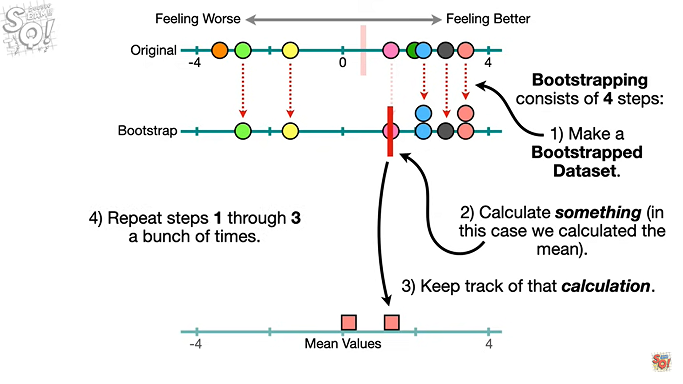

It can be implemented using the scikit-learn method resample:

In [23]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -81.29450000000361
std. error: 227.62325202978278


## **Confidence Intervals**

* “Given a sampling procedure and a population, what is the probability that the true value lies within a certain interval?”

* the more confident you want to be, and the less data you have, the wider you must make the confidence interval to be sufficiently assured of capturing the true value.

* Measure level of uncertainty

* How likely it covers the true value

* Pr(CI covers the true value) = confidence level

Source: Source: https://www.youtube.com/watch?v=Xz0x-8-cgaQ&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=24

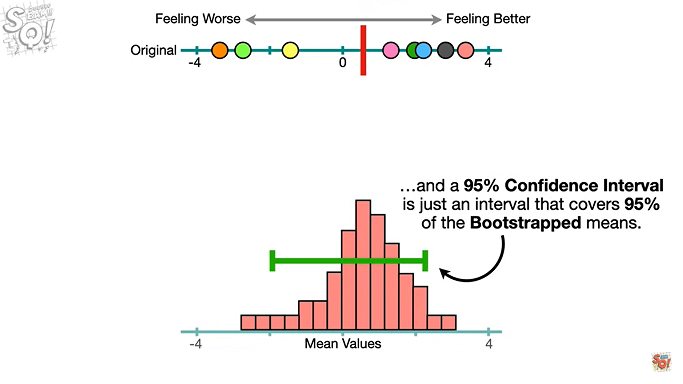

Source: https://www.youtube.com/watch?v=Xz0x-8-cgaQ&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=24

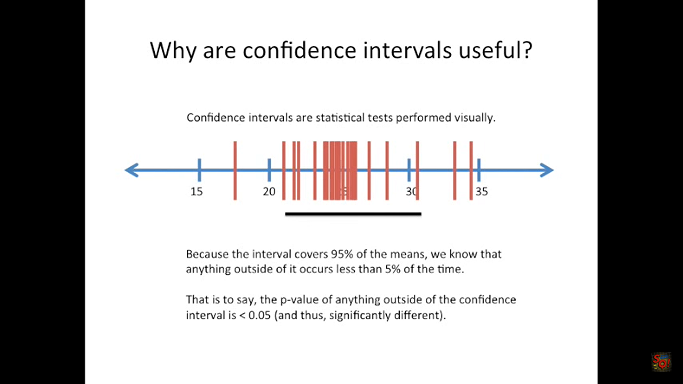

68760.51844
55734.1


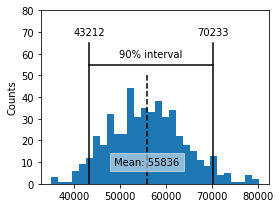

In [24]:

print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

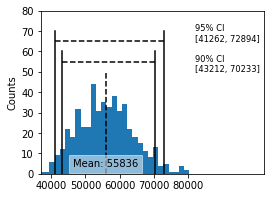

In [25]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

https://machinelearningmastery.com/confidence-intervals-for-machine-learning/

Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

Consider a model with an error of 20%, or 0.2 (error = 0.2), on a validation dataset with 50 examples (n = 50). We can calculate the 95% confidence interval (z = 1.96) as follow

In [26]:
# binomial confidence interval
from math import sqrt
interval = 1.96 * sqrt( (0.2 * (1 - 0.2)) / 50)
print('%.3f' % interval)

0.111


* The classification error of the model is 20% +/- 11%
* The true classification error of the model is likely between 9% and 31%.

We can see the impact that the sample size has on the precision of the estimate in terms of the radius of the confidence interval.

In [27]:
interval = 1.96 * sqrt( (0.2 * (1 - 0.2)) / 100)
print('%.3f' % interval)

0.078


this function in a hypothetical case where a model made 88 correct predictions out of a dataset with 100 instances and we are interested in the 95% confidence interval (provided to the function as a significance of 0.05).

In [28]:
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


# **Normal Distribution**

Converting data to z-scores (i.e., standardizing or normalizing the
data) does not make the data normally distributed. It just puts the
data on the same scale as the standard normal distribution

Most data is not normally distributed.

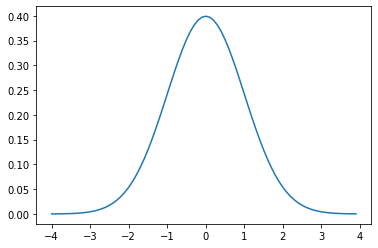

In [29]:
from scipy.stats import norm

x_axis = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

## **Standard Normal and QQ-Plots**

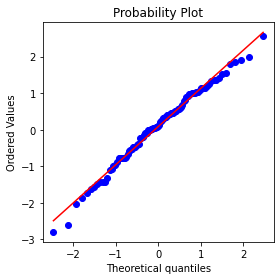

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## **Long-Tailed Distributions**

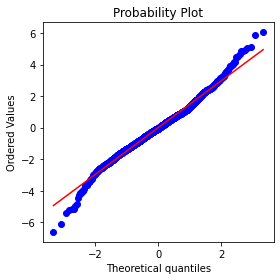

In [31]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

the points are close to the line for the data within one standard deviation of the mean.

## **Student’s t-Distribution**

The larger the sample, the more normally shaped the t-distribution becomes.

Source: https://www.youtube.com/watch?v=yDEvXB6ApWc&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=21

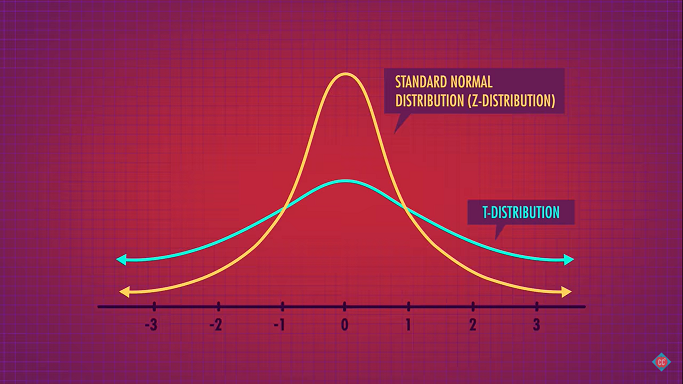

## **Binomial Distribution**

* Binomial outcomes are important to model, since they represent, among other
things, fundamental decisions (buy or don’t buy, click or don’t click, survive or die, etc.).

* A binomial trial is an experiment with two possible outcomes: one with probability p and the other with probability 1 – p.
* With large n, and provided p is not too close to 0 or 1, the binomial distribution
can be approximated by the normal distribution.

Source: https://www.youtube.com/watch?v=YXLVjCKVP7U

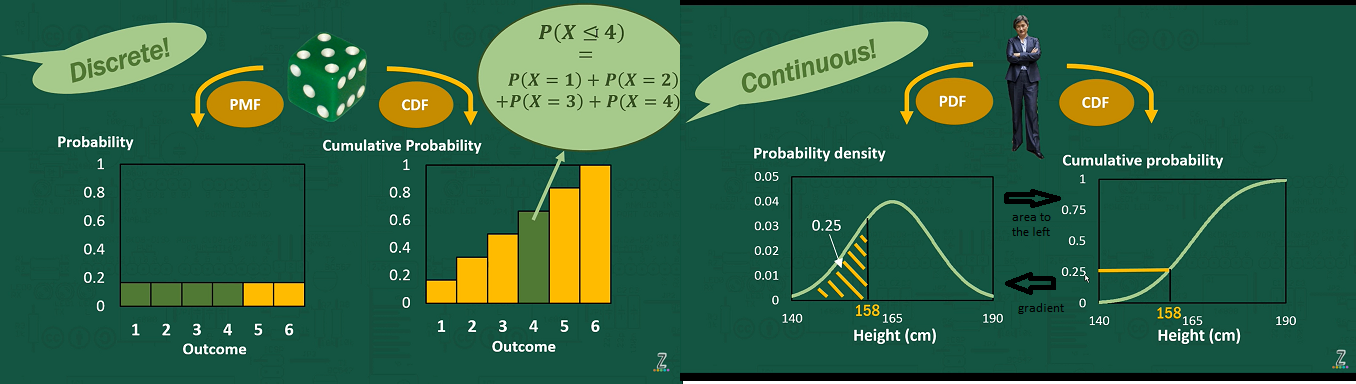

If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [32]:
print(stats.binom.pmf(0, n=200, p=0.02))

0.017587946605721567


In [33]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


In [34]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


## **Chi-Square Distribution**

Ex: test whether one variable (say, a row variable representing gender) is independent of another (say, a column variable representing “was promoted in job”), and you have counts of the number in each of the cells of the data
table.

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. 

Source: https://www.youtube.com/watch?v=80ffqpZdKiA

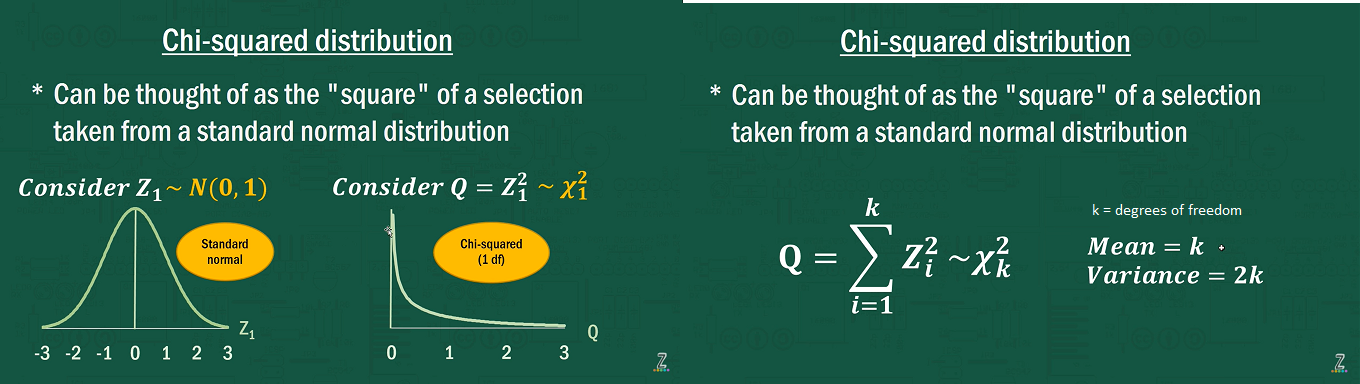

In [35]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


## **F Distribution**

* The F distribution allows us to use an F statistic to compare two populations. 
* For ANOVA tests we can use the F distribution to determine if the variance between the means of two populations significantly differ. 
* The F distribution can also be used in regression analysis to compare the fit of different models. 

https://keydifferences.com/difference-between-t-test-and-f-test.html

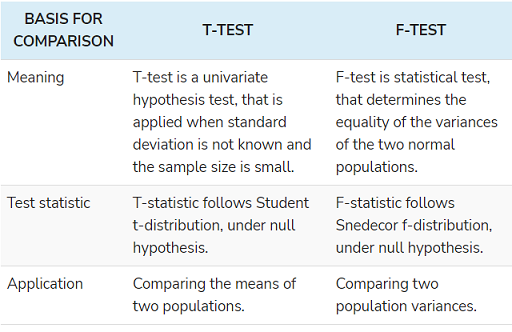

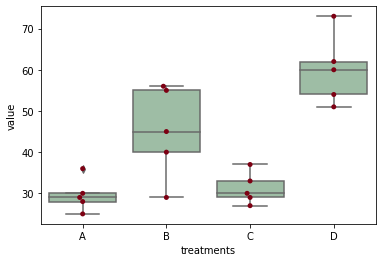

In [36]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [37]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

## **Poisson and Related Distribution**

## **Poisson Distributions**

The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units.

Ex: if incoming customer service calls average two per minute (lambda parameter), this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

https://www.youtube.com/watch?v=cPOChr_kuQs

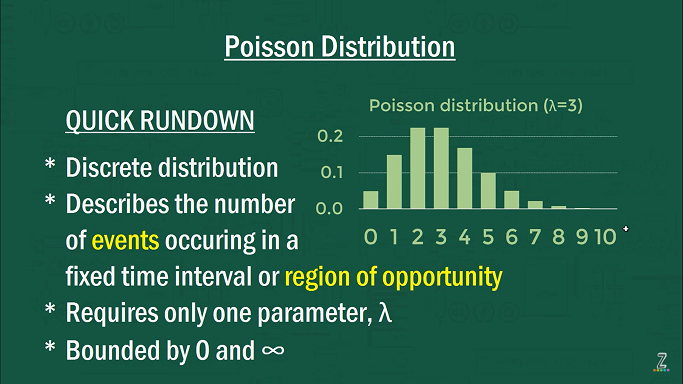

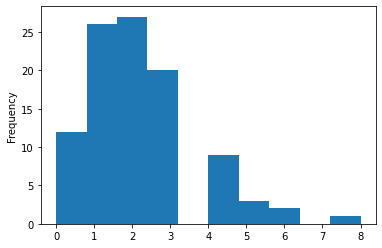

In [38]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## **Exponential Distribution**

the distribution of the time between events

https://www.youtube.com/watch?v=2kg1O0j1J9c

Inverse of Poisson

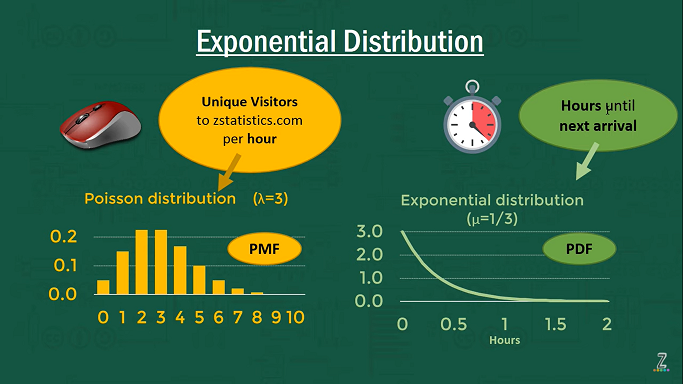

So you could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.

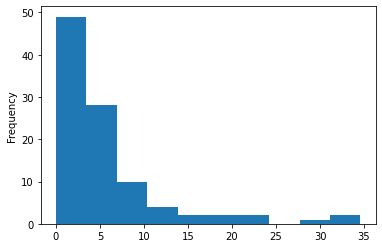

In [39]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

## **Weibull Distribution**

The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, β.

* If β > 1, the probability of an event increases over time; 
* if β < 1, the probability decreases.

For example, the following code would generate 100 random numbers (lifetimes) from a Weibull distribution with shape of 1.5 and characteristic life of 5,000:

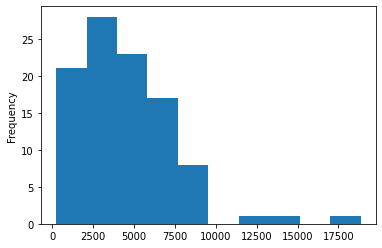

In [40]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()